# Table of Contents:
1. [Library Imports](#li)
2. [Data Preparation](#dp)
3. [Method Comparison](#mc)
4. [K-Means](#km)
5. [Hierarchical](#h)
6. [DBSCAN](#d)
7. [UMAP](#u)

# 1. Library Imports
<a id='li'></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from utils2 import *
import umap

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

# 2. Data Preparation
<a id='dp'></a>

#### Import the data

In [3]:
data = pd.read_csv('Data/New_Data/project_data_99_educ_perc.csv')

#### Define metrics to study

In [4]:
demographic_metrics = ['frequency_items', 'potencial_score', 'zip_code', 'longevity_months', 'credit_factor', 'relevance_criteria', 'recency_in_weeks', 'returns', 'flaged', 'promotional_percentage']
demographic_metrics_selection = ['frequency_items', 'potencial_score', 'longevity_months', 'credit_factor', 'recency_in_weeks', 'returns', 'promotional_percentage']

In [5]:
demographic = data[demographic_metrics]
demographic_selection = data[demographic_metrics_selection]

#### Encode categorical variables

In [8]:
def get_ohc_df(df, feats):
  # Use OneHotEncoder to encode the categorical features.
  # Get feature names and create a DataFrame
  # with the one-hot encoded categorical features (pass feature names)

  ohc = OneHotEncoder(sparse_output=False, drop="first")
  ohc_feat = ohc.fit_transform(df[feats])
  ohc_feat_names = ohc.get_feature_names_out()
  ohc_df = pd.DataFrame(ohc_feat, index=df.index, columns=ohc_feat_names)

  # Reassigning df to contain ohc variables
  df_ohc = pd.concat([df, ohc_df], axis=1)

  return df_ohc, ohc

demographic, ohc = get_ohc_df(demographic, ['relevance_criteria'])

demographic

,frequency_items,potencial_score,zip_code,longevity_months,credit_factor,relevance_criteria,recency_in_weeks,returns,flaged,promotional_percentage,relevance_criteria_Priority,relevance_criteria_Unknown
0,38,-0.40,0,23,0.7,Priority,15,0,0,20,1.0,0.0
1,50,-0.30,0,24,0.7,Priority,10,0,0,36,1.0,0.0
2,48,1.60,0,32,0.7,Priority,20,0,0,0,1.0,0.0
3,46,-0.90,0,12,4.5,Priority,14,0,0,36,1.0,0.0
4,31,31.61,8,10,0.7,Priority,12,0,0,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122124,51,0.10,0,25,0.7,Priority,9,6,0,0,1.0,0.0
122125,42,30.99,8,23,0.7,Priority,15,0,0,0,1.0,0.0
122126,24,79.76,8,29,0.7,Priority,13,0,0,13,1.0,0.0
122127,29,0.50,0,14,0.7,Priority,11,0,0,0,1.0,0.0


In [9]:
demographic.drop(columns=['relevance_criteria'], inplace=True)

In [10]:
demographic_metrics = ['frequency_items', 'potencial_score', 'zip_code', 'longevity_months', 'credit_factor', 'relevance_criteria_Priority', 'relevance_criteria_Unknown', 'recency_in_weeks', 'returns', 'flaged', 'promotional_percentage']

#### Scale the data

In [11]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [12]:
dem_no_scl = demographic.copy()
dem_st_scl = standard.fit_transform(demographic)
dem_mm_scl = minmax.fit_transform(demographic)
dem_rb_scl = robust.fit_transform(demographic)

In [13]:
demographic_no_scl = demographic.copy()
demographic_no_scl[demographic_metrics] = dem_no_scl

demographic_st_scl = demographic.copy()
demographic_st_scl[demographic_metrics] = dem_st_scl

demographic_mm_scl = demographic.copy()
demographic_mm_scl[demographic_metrics] = dem_mm_scl

demographic_rb_scl = demographic.copy()
demographic_rb_scl[demographic_metrics] = dem_rb_scl

In [115]:
sample_original = demographic.sample(frac=0.2, random_state=1)
sample_no_scl = demographic_no_scl.sample(frac=0.2, random_state=1)
sample_st_scl = demographic_st_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = demographic_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = demographic_rb_scl.sample(frac=0.2, random_state=1)

# Clustering Method Comparison
<a id='mc'></a>

In [15]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)
hierarchical = AgglomerativeClustering(metric='euclidean')

### No Scale

In [16]:
dem_no_r2_scores = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores

,kmeans,complete,average,single,ward
2,0.405580,0.105642,0.141154,0.002361,0.374174
3,0.562184,0.173080,0.148030,0.004641,0.546039
4,0.648699,0.176953,0.194773,0.013550,0.619428
5,0.695330,0.231149,0.195748,0.039619,0.669798
6,0.723928,0.233340,0.199279,0.042905,0.714062
7,0.751285,0.259723,0.244630,0.043146,0.732828
8,0.769905,0.540059,0.245166,0.044929,0.749611
9,0.786577,0.554711,0.252408,0.045989,0.763391


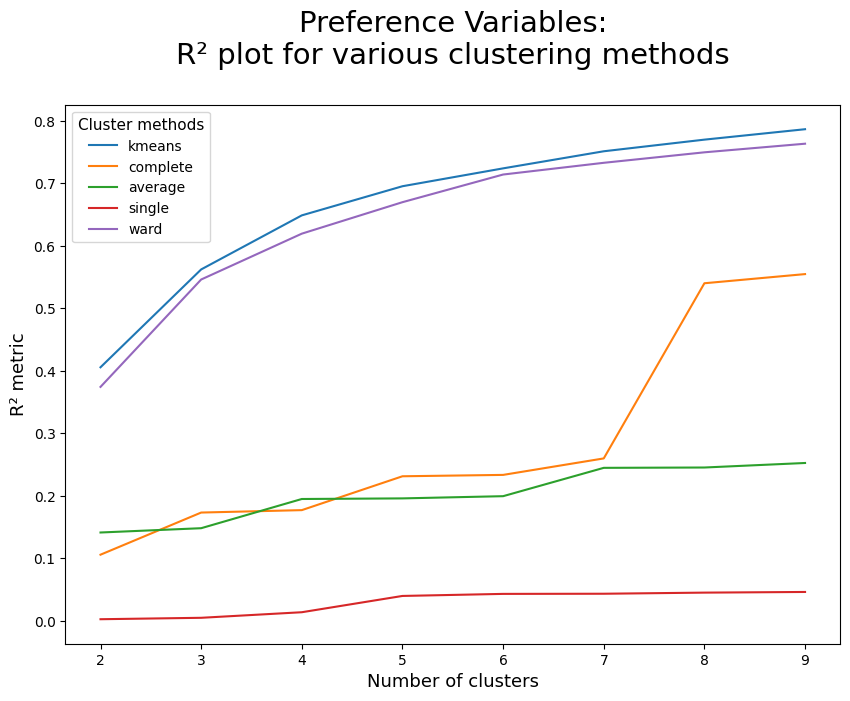

In [17]:
plot_r2_scores(dem_no_r2_scores)

In [18]:
dem_st_r2_scores = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores

,kmeans,complete,average,single,ward
2,0.530941,0.118446,0.024435,0.025304,0.483200
3,0.618212,0.136652,0.136037,0.025564,0.613755
4,0.688949,0.167714,0.167907,0.029886,0.674768
5,0.723709,0.170686,0.168008,0.092903,0.702292
6,0.741383,0.665984,0.170157,0.162410,0.723596
7,0.754402,0.667747,0.172612,0.163035,0.743706
8,0.770653,0.677874,0.668278,0.163700,0.756801
9,0.782166,0.693904,0.669348,0.163876,0.769406


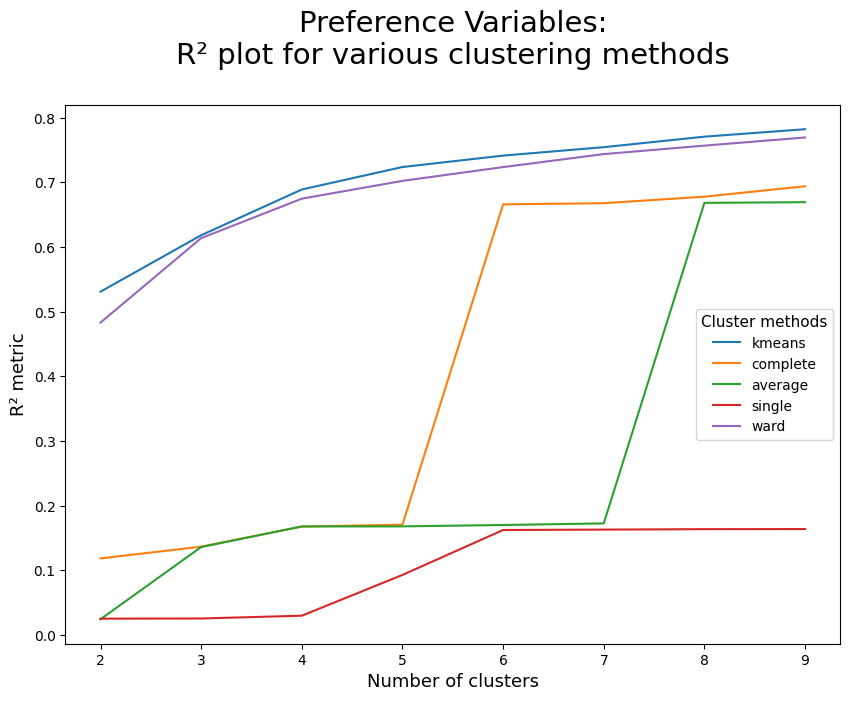

In [19]:
plot_r2_scores(dem_st_r2_scores)

In [20]:
dem_mm_r2_scores = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores

,kmeans,complete,average,single,ward
2,0.530941,0.118446,0.024435,0.025304,0.483200
3,0.618212,0.136652,0.136037,0.025564,0.613755
4,0.688949,0.167714,0.167907,0.029886,0.674768
5,0.723709,0.170686,0.168008,0.092903,0.702292
6,0.741383,0.665984,0.170157,0.162410,0.723596
7,0.754402,0.667747,0.172612,0.163035,0.743706
8,0.770653,0.677874,0.668278,0.163700,0.756801
9,0.782166,0.693904,0.669348,0.163876,0.769406


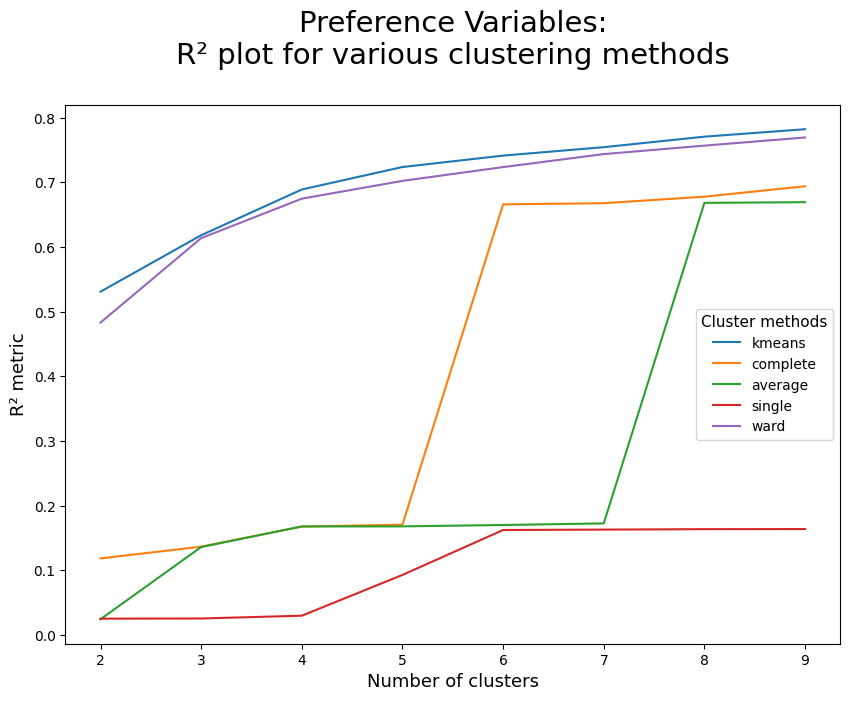

In [21]:
plot_r2_scores(dem_mm_r2_scores)

In [22]:
dem_rb_r2_scores = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores

,kmeans,complete,average,single,ward
2,0.721062,0.433514,0.642145,0.004194,0.681505
3,0.889008,0.854411,0.690575,0.004387,0.883959
4,0.928456,0.869338,0.694764,0.061312,0.922083
5,0.948236,0.901838,0.711787,0.061331,0.944937
6,0.957236,0.906025,0.944439,0.070563,0.955316
7,0.966097,0.907552,0.945855,0.127897,0.964273
8,0.971870,0.908744,0.950875,0.139852,0.969921
9,0.975509,0.916807,0.951382,0.210886,0.973570


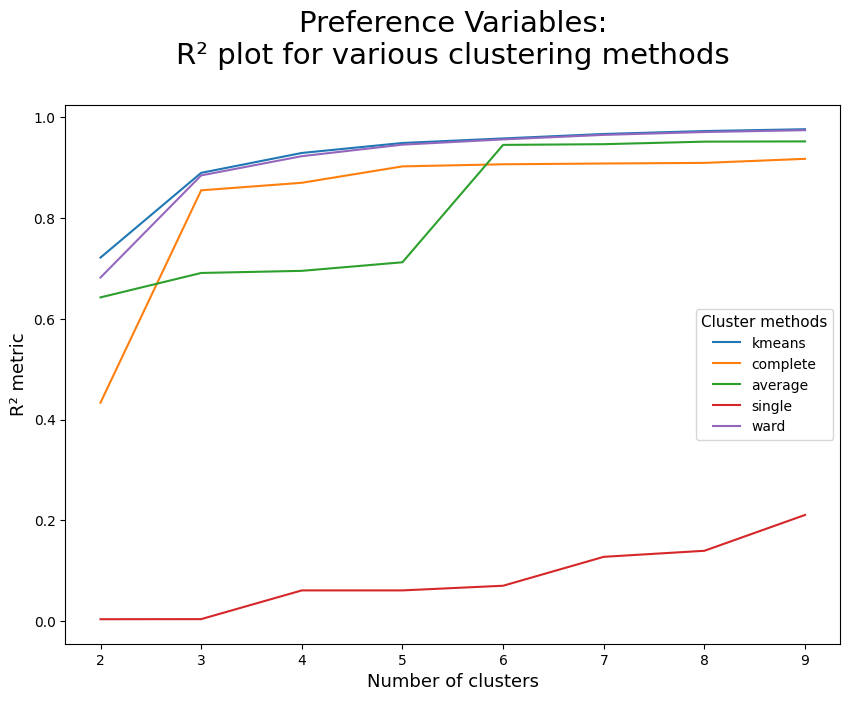

In [23]:
plot_r2_scores(dem_rb_r2_scores)

# SEM ALGUMAS VARIAVEIS (flagged, relevance criteria)

In [24]:
dem_no_r2_scores_s = get_r2_df(sample_no_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_no_r2_scores_s

,kmeans,complete,average,single,ward
2,0.532964,0.059242,0.000305,0.532964,0.532964
3,0.643101,0.145025,0.048858,0.533190,0.640673
4,0.709202,0.173154,0.564326,0.533353,0.696143
5,0.748136,0.621686,0.565216,0.533581,0.732100
6,0.773744,0.643352,0.626986,0.533732,0.752267
7,0.795207,0.678602,0.628302,0.533869,0.772354
8,0.816675,0.680624,0.628368,0.533977,0.791331
9,0.834314,0.695027,0.633331,0.535553,0.810077


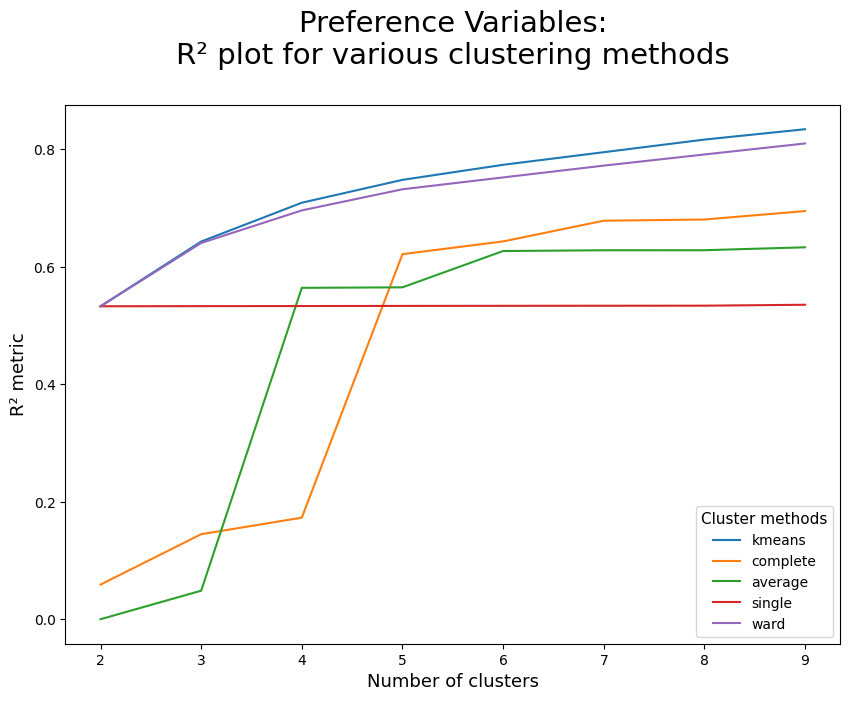

In [25]:
plot_r2_scores(dem_no_r2_scores_s)

In [26]:
dem_st_r2_scores_s = get_r2_df(sample_st_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_st_r2_scores_s

,kmeans,complete,average,single,ward
2,0.399760,0.086917,0.045174,0.000425,0.381507
3,0.504125,0.132093,0.132093,0.045603,0.469539
4,0.582615,0.197994,0.132316,0.132316,0.545007
5,0.632657,0.567796,0.133541,0.133541,0.601451
6,0.678840,0.574892,0.169451,0.138720,0.645422
7,0.707772,0.593010,0.542552,0.145804,0.688166
8,0.744648,0.598188,0.547731,0.531726,0.713585
9,0.769742,0.599324,0.547835,0.531869,0.737540


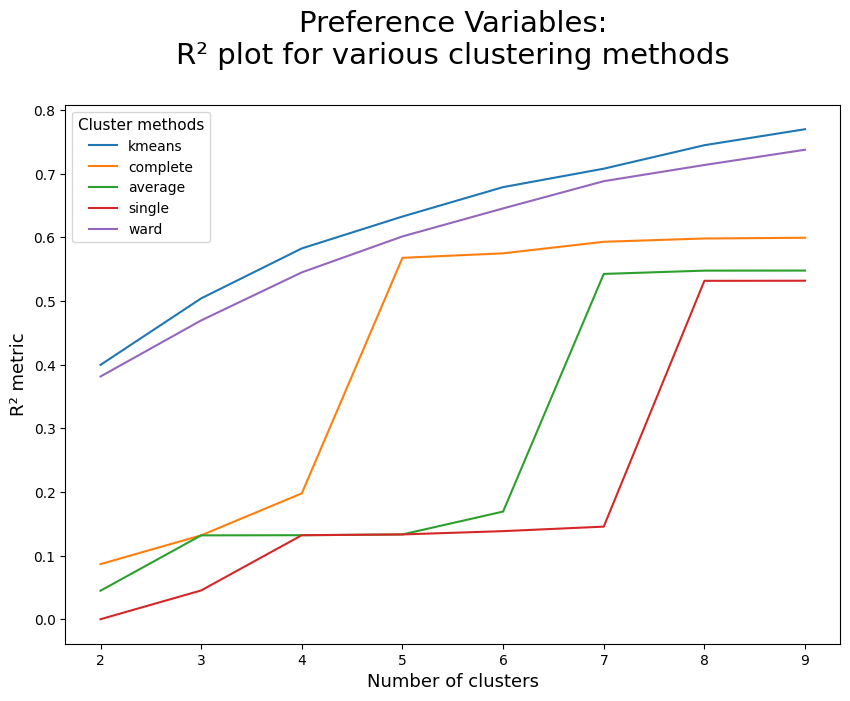

In [27]:
plot_r2_scores(dem_st_r2_scores_s)

In [28]:
dem_mm_r2_scores_s = get_r2_df(sample_mm_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_mm_r2_scores_s

,kmeans,complete,average,single,ward
2,0.399760,0.086917,0.045174,0.000425,0.381507
3,0.504125,0.132093,0.132093,0.045603,0.469539
4,0.582615,0.197994,0.132316,0.132316,0.545007
5,0.632657,0.567796,0.133541,0.133541,0.601451
6,0.678840,0.574892,0.169451,0.138720,0.645422
7,0.707772,0.593010,0.542552,0.145804,0.688166
8,0.744648,0.598188,0.547731,0.531726,0.713585
9,0.769742,0.599324,0.547835,0.531869,0.737540


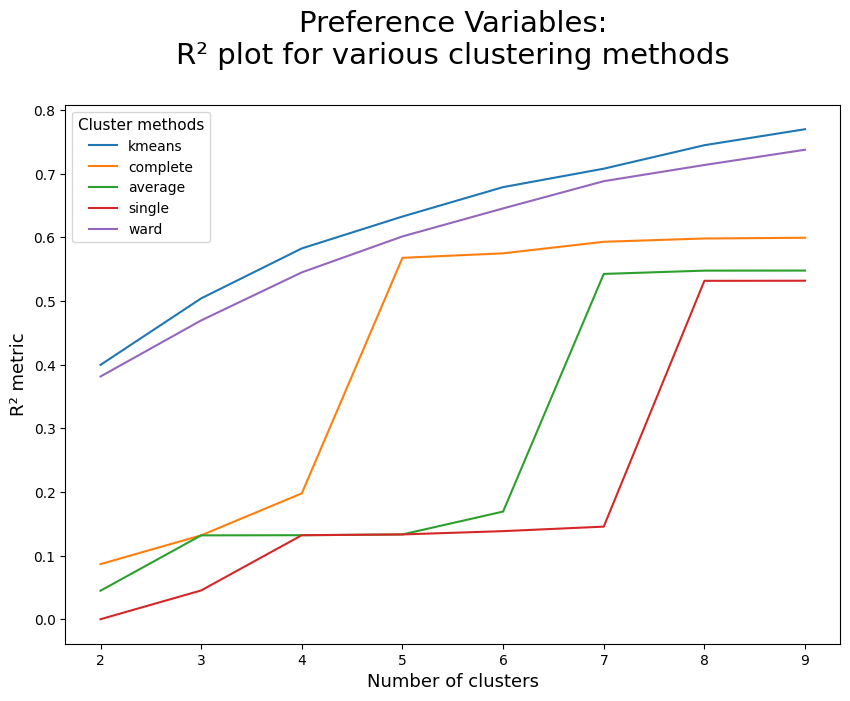

In [29]:
plot_r2_scores(dem_mm_r2_scores_s)

In [30]:
dem_rb_r2_scores_s = get_r2_df(sample_rb_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_rb_r2_scores_s

,kmeans,complete,average,single,ward
2,0.415800,0.180262,0.180262,0.180262,0.414883
3,0.549354,0.532848,0.183041,0.183041,0.571549
4,0.683830,0.533743,0.533743,0.183167,0.683755
5,0.739283,0.675829,0.684724,0.533868,0.739196
6,0.791099,0.722061,0.684850,0.534297,0.781591
7,0.827014,0.728577,0.725801,0.534306,0.816217
8,0.844604,0.733082,0.725855,0.540522,0.831037
9,0.856190,0.733850,0.726680,0.540710,0.843860


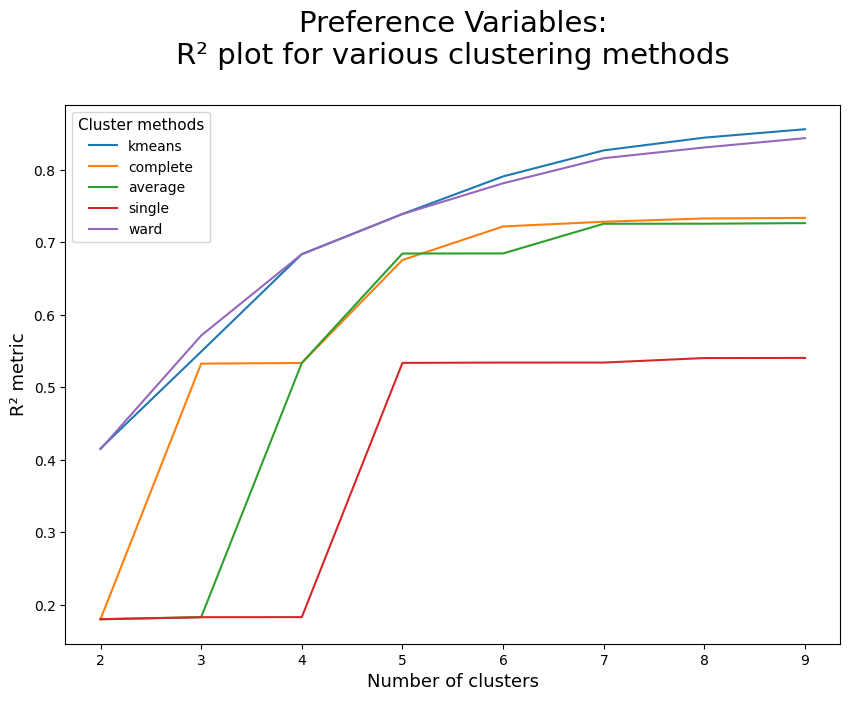

In [31]:
plot_r2_scores(dem_rb_r2_scores_s)

In [32]:
# Prefix the names of the columns
df_no_prefixed = dem_no_r2_scores.add_prefix("no_")
df_st_prefixed = dem_st_r2_scores.add_prefix("st_")
df_mm_prefixed = dem_mm_r2_scores.add_prefix("mm_")
df_rb_prefixed = dem_rb_r2_scores.add_prefix("rb_")

# Concatenate the dataframes
df_combined = pd.concat([df_no_prefixed, df_st_prefixed, df_mm_prefixed, df_rb_prefixed], axis=1)

# Filter ward and kmeans columns
filtered_columns = [col for col in df_combined.columns if 'ward' in col or 'kmeans' in col]

# Create a new dataframe with only the filtered columns
df_filtered = df_combined[filtered_columns]
df_filtered

,no_kmeans,no_ward,st_kmeans,st_ward,mm_kmeans,mm_ward,rb_kmeans,rb_ward
2,0.405580,0.374174,0.530941,0.483200,0.530941,0.483200,0.721062,0.681505
3,0.562184,0.546039,0.618212,0.613755,0.618212,0.613755,0.889008,0.883959
4,0.648699,0.619428,0.688949,0.674768,0.688949,0.674768,0.928456,0.922083
5,0.695330,0.669798,0.723709,0.702292,0.723709,0.702292,0.948236,0.944937
6,0.723928,0.714062,0.741383,0.723596,0.741383,0.723596,0.957236,0.955316
7,0.751285,0.732828,0.754402,0.743706,0.754402,0.743706,0.966097,0.964273
8,0.769905,0.749611,0.770653,0.756801,0.770653,0.756801,0.971870,0.969921
9,0.786577,0.763391,0.782166,0.769406,0.782166,0.769406,0.975509,0.973570


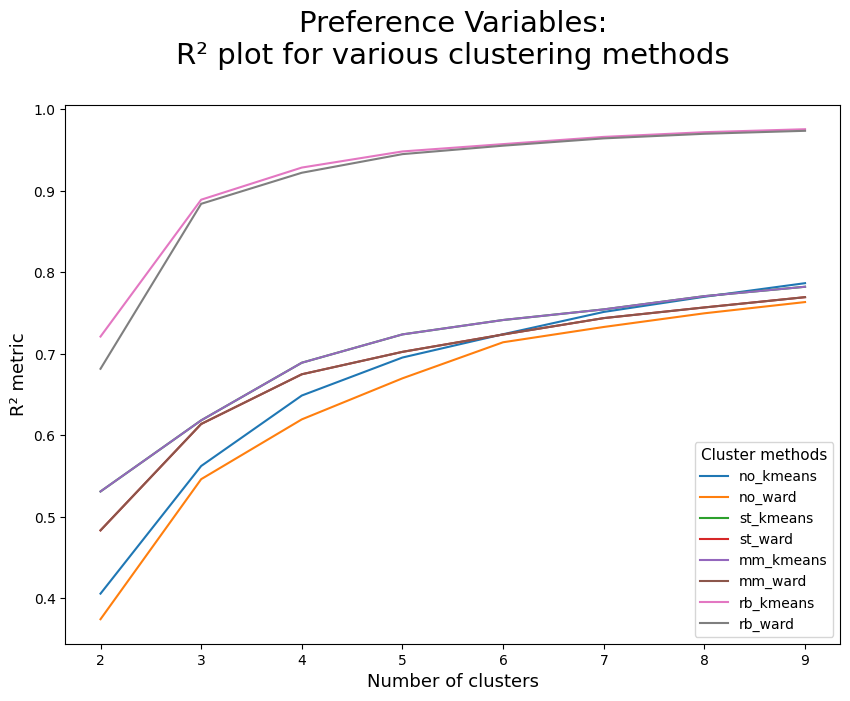

In [33]:
plot_r2_scores(df_filtered)

In [34]:
# Prefix the names of the columns
df_no_prefixed_s = dem_no_r2_scores_s.add_prefix("no_")
df_st_prefixed_s = dem_st_r2_scores_s.add_prefix("st_")
df_mm_prefixed_s = dem_mm_r2_scores_s.add_prefix("mm_")
df_rb_prefixed_s = dem_rb_r2_scores_s.add_prefix("rb_")

# Concatenate the dataframes
df_combined_s = pd.concat([df_no_prefixed_s, df_st_prefixed_s, df_mm_prefixed_s, df_rb_prefixed_s], axis=1)

# Filter ward and kmeans columns
filtered_columns_s = [col for col in df_combined_s.columns if 'ward' in col or 'kmeans' in col]

# Create a new dataframe with only the filtered columns
df_filtered_s = df_combined_s[filtered_columns_s]
df_filtered_s

,no_kmeans,no_ward,st_kmeans,st_ward,mm_kmeans,mm_ward,rb_kmeans,rb_ward
2,0.532964,0.532964,0.399760,0.381507,0.399760,0.381507,0.415800,0.414883
3,0.643101,0.640673,0.504125,0.469539,0.504125,0.469539,0.549354,0.571549
4,0.709202,0.696143,0.582615,0.545007,0.582615,0.545007,0.683830,0.683755
5,0.748136,0.732100,0.632657,0.601451,0.632657,0.601451,0.739283,0.739196
6,0.773744,0.752267,0.678840,0.645422,0.678840,0.645422,0.791099,0.781591
7,0.795207,0.772354,0.707772,0.688166,0.707772,0.688166,0.827014,0.816217
8,0.816675,0.791331,0.744648,0.713585,0.744648,0.713585,0.844604,0.831037
9,0.834314,0.810077,0.769742,0.737540,0.769742,0.737540,0.856190,0.843860


In [36]:
df_filtered_s.columns

Index(['no_kmeans', 'no_ward', 'st_kmeans', 'st_ward', 'mm_kmeans', 'mm_ward',
       'rb_kmeans', 'rb_ward'],
      dtype='object')

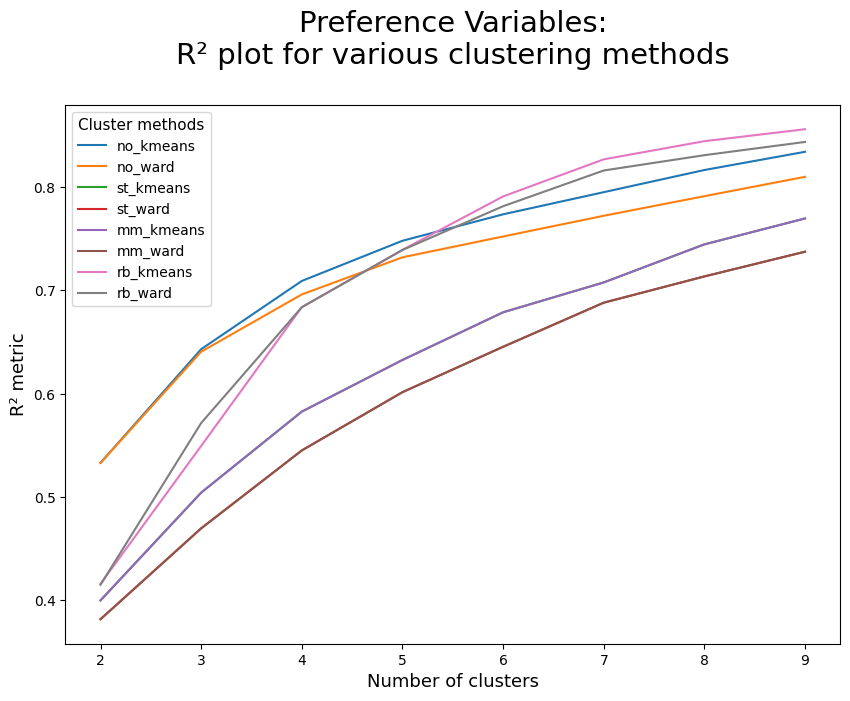

In [39]:
plot_r2_scores(df_filtered_s)

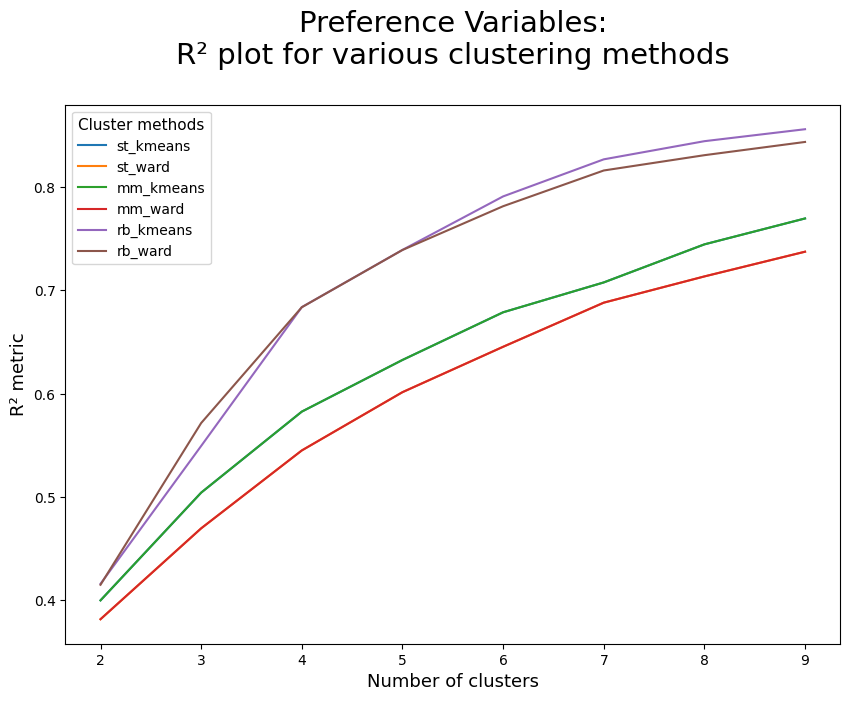

In [ ]:
plot_r2_scores(df_filtered_s[['st_kmeans', 'st_ward', 'mm_kmeans', 'mm_ward',
       'rb_kmeans', 'rb_ward']])

In [41]:
demographic

,frequency_items,potencial_score,zip_code,longevity_months,credit_factor,recency_in_weeks,returns,flaged,promotional_percentage,relevance_criteria_Priority,relevance_criteria_Unknown
0,38,-0.40,0,23,0.7,15,0,0,20,1.0,0.0
1,50,-0.30,0,24,0.7,10,0,0,36,1.0,0.0
2,48,1.60,0,32,0.7,20,0,0,0,1.0,0.0
3,46,-0.90,0,12,4.5,14,0,0,36,1.0,0.0
4,31,31.61,8,10,0.7,12,0,0,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
122124,51,0.10,0,25,0.7,9,6,0,0,1.0,0.0
122125,42,30.99,8,23,0.7,15,0,0,0,1.0,0.0
122126,24,79.76,8,29,0.7,13,0,0,13,1.0,0.0
122127,29,0.50,0,14,0.7,11,0,0,0,1.0,0.0


In [46]:
data['relevance_criteria'].value_counts()

relevance_criteria
Priority    114585
Caution       5505
Unknown       2039
Name: count, dtype: int64

In [47]:
demographic_metrics_selection

['frequency_items',
 'potencial_score',
 'longevity_months',
 'credit_factor',
 'recency_in_weeks',
 'returns',
 'promotional_percentage']

In [44]:
992/len(demographic) * 100

0.8122558933586618

---

# Batota UMAP

In [48]:
umap_object = umap.UMAP(random_state=1)

In [116]:
# umap_embedding_no = umap_object.fit_transform(sample_no_scl)
umap_embedding_st = umap_object.fit_transform(sample_st_scl)
# umap_embedding_mm = umap_object.fit_transform(sample_mm_scl)
# umap_embedding_rb = umap_object.fit_transform(sample_rb_scl)

# umap_embedding_no_s = umap_object.fit_transform(sample_no_scl[demographic_metrics_selection])
umap_embedding_st_s = umap_object.fit_transform(sample_st_scl[demographic_metrics_selection])
# umap_embedding_mm_s = umap_object.fit_transform(sample_mm_scl[demographic_metrics_selection])
# umap_embedding_rb_s = umap_object.fit_transform(sample_rb_scl[demographic_metrics_selection])

demographic_metrics_selection2 = ['frequency_items', 'potencial_score', 'longevity_months', 'credit_factor', 'recency_in_weeks', 'promotional_percentage']

umap_embedding_no_s2 = umap_object.fit_transform(sample_no_scl[demographic_metrics_selection2])
umap_embedding_st_s2 = umap_object.fit_transform(sample_st_scl[demographic_metrics_selection2])
umap_embedding_mm_s2 = umap_object.fit_transform(sample_mm_scl[demographic_metrics_selection2])
umap_embedding_rb_s2 = umap_object.fit_transform(sample_rb_scl[demographic_metrics_selection2])


In [118]:
sample_original['constant'] = 1

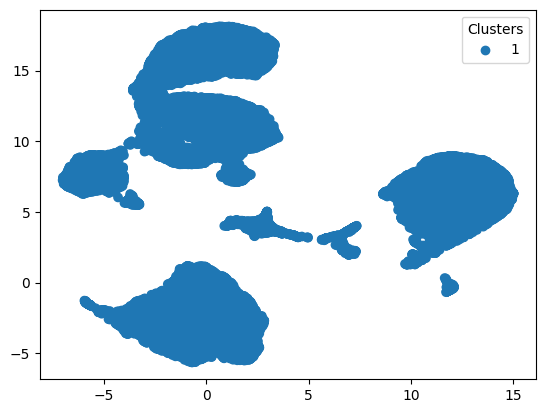

In [52]:
visualize_dimensionality_reduction(umap_embedding_no, sample_original['constant'])

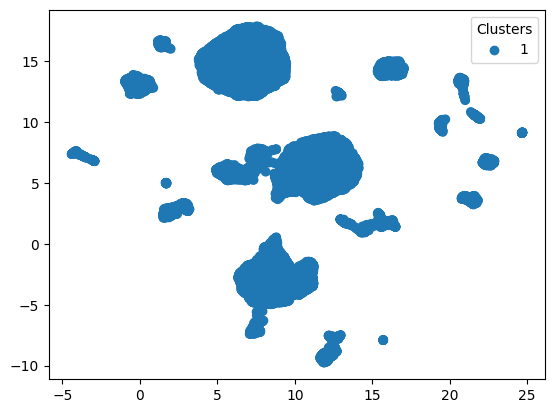

In [119]:
visualize_dimensionality_reduction(umap_embedding_st, sample_original['constant'])

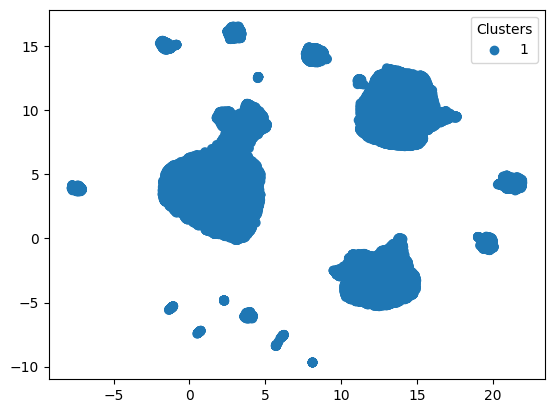

In [54]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['constant'])

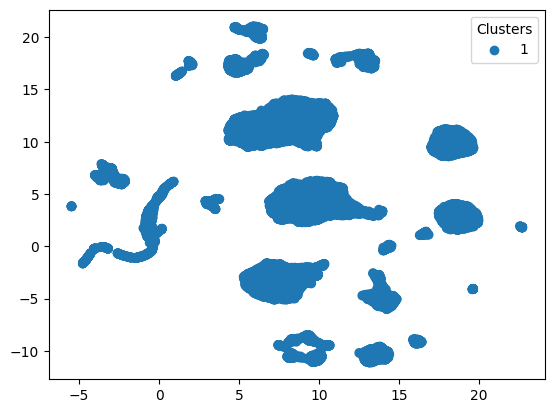

In [55]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['constant'])

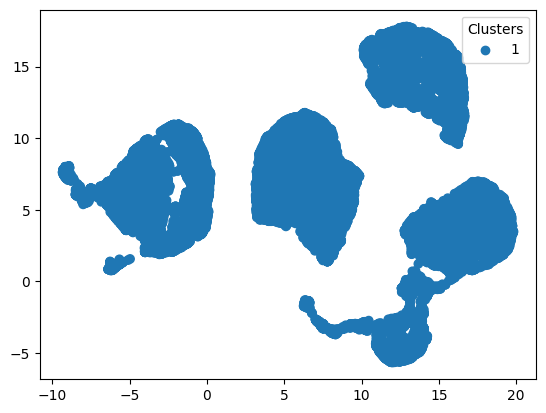

In [111]:
visualize_dimensionality_reduction(umap_embedding_no_s, sample_original['constant'])

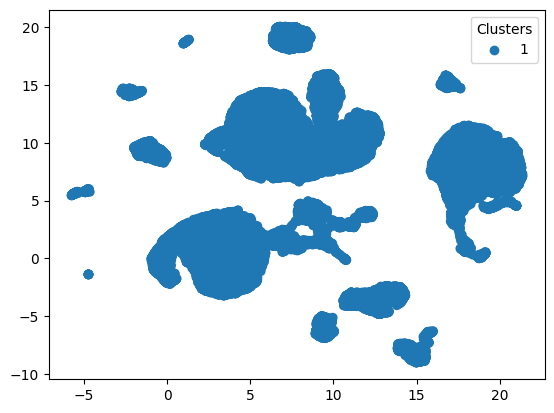

In [120]:
visualize_dimensionality_reduction(umap_embedding_st_s, sample_original['constant'])

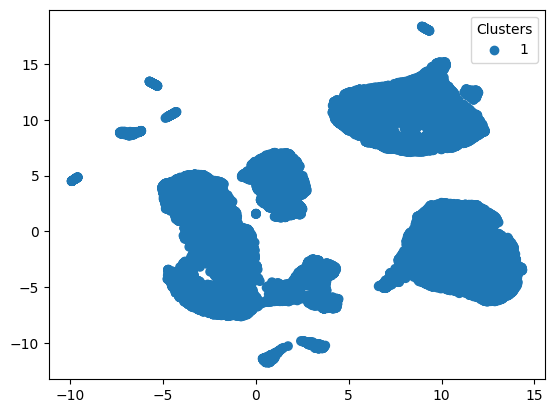

In [113]:
visualize_dimensionality_reduction(umap_embedding_mm_s, sample_original['constant'])

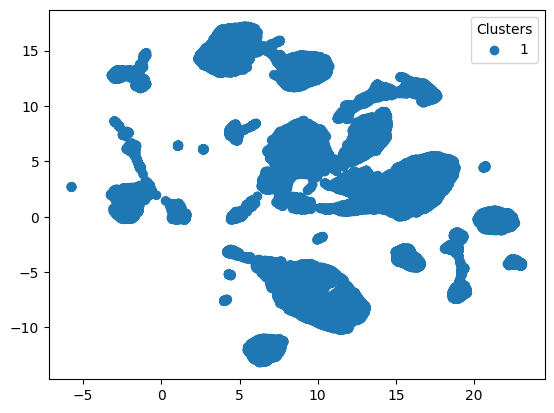

In [110]:
visualize_dimensionality_reduction(umap_embedding_rb_s, sample_original['constant'])

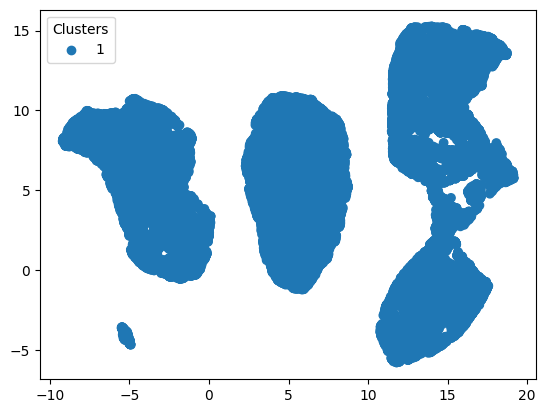

In [121]:
visualize_dimensionality_reduction(umap_embedding_no_s2, sample_original['constant'])

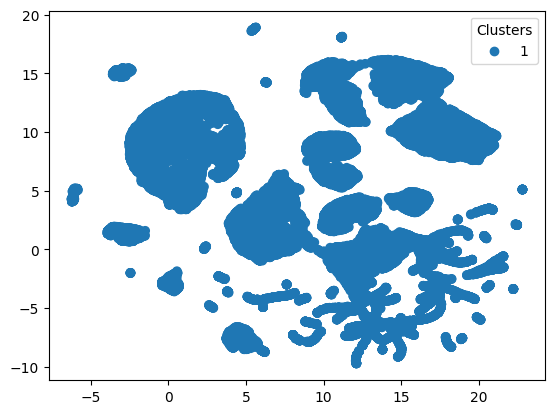

In [124]:
visualize_dimensionality_reduction(umap_embedding_st_s2, sample_original['constant'])

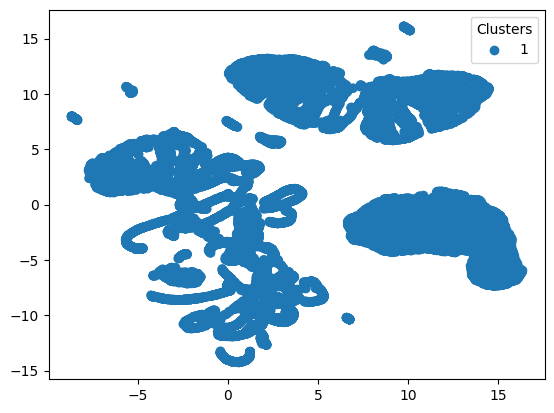

In [125]:
visualize_dimensionality_reduction(umap_embedding_mm_s2, sample_original['constant'])

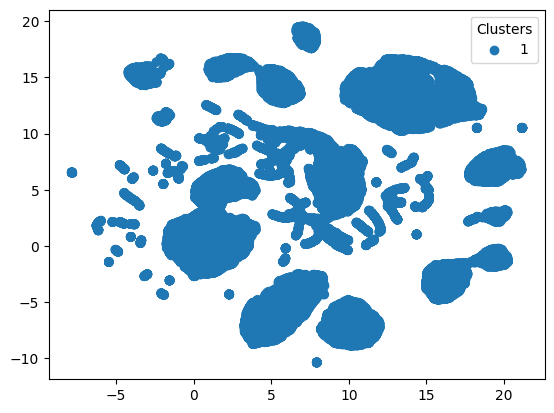

In [126]:
visualize_dimensionality_reduction(umap_embedding_rb_s2, sample_original['constant'])

In [135]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl[demographic_metrics_selection2])
sample_original['rb_kmeans6'] = kmeans.predict(sample_rb_scl[demographic_metrics_selection2])

In [136]:
groupby_mean(sample_original, 'rb_kmeans6', True)

# observations per cluster: [14596, 1927, 647, 4808, 6, 2442]


rb_kmeans6,0,1,2,3,4,5
frequency_items,37.340000,37.890000,39.220000,40.570000,37.170000,38.430000
potencial_score,14.150000,23.370000,11.770000,80.060000,0.980000,29.110000
zip_code,3.910000,3.740000,1.760000,7.680000,0.000000,4.670000
longevity_months,15.110000,14.310000,11.710000,16.920000,14.500000,11.930000
credit_factor,0.780000,2.100000,4.450000,0.760000,27.700000,0.000000
recency_in_weeks,15.280000,16.020000,16.680000,14.760000,15.000000,15.280000
returns,2.710000,2.300000,9.210000,6.510000,0.000000,3.160000
flaged,0.010000,0.000000,0.010000,0.020000,0.000000,0.010000
promotional_percentage,10.160000,21.710000,23.090000,12.940000,0.000000,5.510000
relevance_criteria_Priority,0.960000,0.980000,0.930000,0.940000,1.000000,0.800000


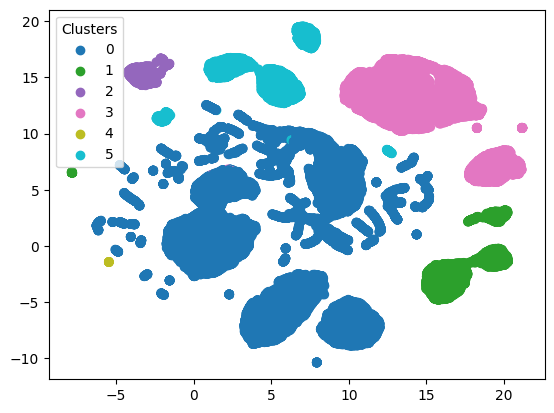

In [137]:
visualize_dimensionality_reduction(umap_embedding_rb_s2, sample_original['rb_kmeans6'])

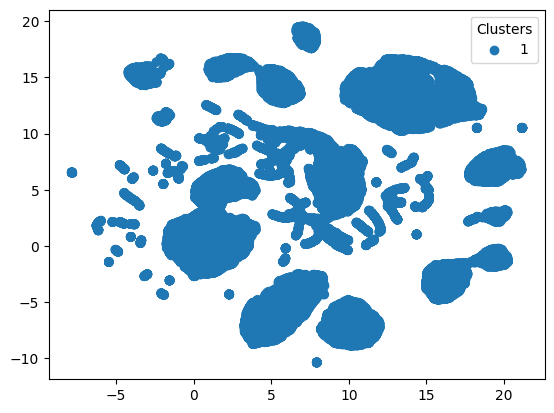

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb_s2, sample_original['constant'])

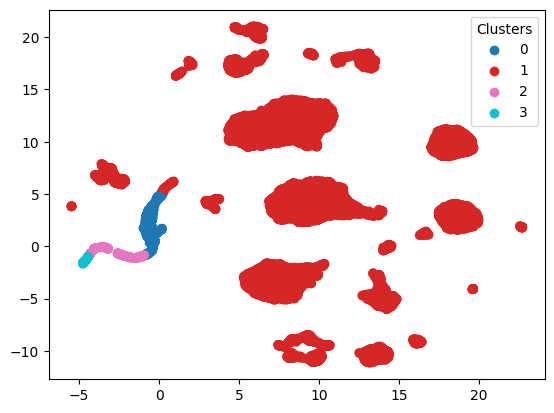

In [103]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_kmeans4'])

In [104]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl[demographic_metrics_selection])
sample_original['rb_kmeans4'] = kmeans.predict(sample_rb_scl[demographic_metrics_selection])

In [105]:
groupby_mean(sample_original, 'rb_kmeans4', True)

# observations per cluster: [21845, 1928, 647, 6]


rb_kmeans4,0,1,2,3
frequency_items,38.170000,37.900000,39.220000,37.170000
potencial_score,30.320000,23.400000,11.770000,0.980000
zip_code,4.820000,3.740000,1.760000,0.000000
longevity_months,15.150000,14.310000,11.710000,14.500000
credit_factor,0.690000,2.100000,4.450000,27.700000
recency_in_weeks,15.160000,16.020000,16.680000,15.000000
returns,3.590000,2.300000,9.210000,0.000000
flaged,0.010000,0.000000,0.010000,0.000000
promotional_percentage,10.250000,21.700000,23.090000,0.000000
relevance_criteria_Priority,0.940000,0.980000,0.930000,1.000000


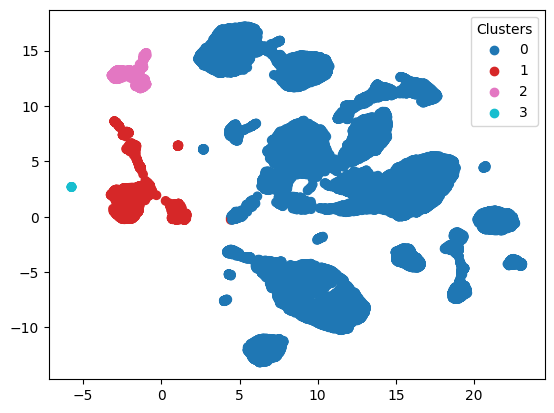

In [107]:
visualize_dimensionality_reduction(umap_embedding_rb_s, sample_original['rb_kmeans4'])